In [3]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\REF COM2019\testset.csv")  # Make sure the file is in your working directory

# Step 3: View the first few rows
df.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
# Step 1: Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Step 2: Make a copy for cleaning
df_clean = df.copy()

# Step 3: Replace -9999.0 with NaN
df_clean.replace(-9999.0, pd.NA, inplace=True)

# Step 4: Drop rows with missing critical weather fields
required_cols = ["_tempm", "_hum", "_wspdm", "_wdire", "_conds"]
df_clean = df_clean.dropna(subset=required_cols)

# Step 5: Reset index
df_clean.reset_index(drop=True, inplace=True)

# View the cleaned data
df_clean.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
2,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
3,19961102-02:00,Smoke,10.0,0,0,NaN,52.0,NaN,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,NaN,NaN,9.3
4,19961102-03:00,Smoke,10.0,0,0,NaN,46.0,NaN,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,NaN,NaN,9.3


In [6]:
# Function to generate a clean natural-language weather summary prompt
def create_prompt(row):
    return (
        f"Write a short weather summary for {row['datetime_utc']}: "
        f"Temperature: {row['_tempm']}°C, "
        f"Humidity: {row['_hum']}%, "
        f"Wind: {row['_wspdm']} km/h from {row['_wdire']}, "
        f"Condition: {row['_conds']}."
    )

# Apply to generate prompt column
df_clean["prompt"] = df_clean.apply(create_prompt, axis=1)

# Preview first 5 prompts
df_clean[["datetime_utc", "prompt"]].head()


,datetime_utc,prompt
0,19961101-11:00,Write a short weather summary for 19961101-11:...
1,19961101-16:00,Write a short weather summary for 19961101-16:...
2,19961101-18:00,Write a short weather summary for 19961101-18:...
3,19961102-02:00,Write a short weather summary for 19961102-02:...
4,19961102-03:00,Write a short weather summary for 19961102-03:...


In [1]:
import openai
openai.api_key = 'Your_API_Key_Here'


In [5]:
print(df.columns.tolist())



['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm', ' _wspdm']


In [6]:
df.columns = df.columns.str.strip()


In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\REF COM2019\testset.csv")

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Replace -9999.0 with NaN
df.replace(-9999.0, pd.NA, inplace=True)

# Drop rows where essential weather fields are missing
df_clean = df.dropna(subset=["_tempm", "_hum", "_wspdm", "_wdire", "_conds"])

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Preview cleaned data
df_clean.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
2,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
3,19961102-02:00,Smoke,10.0,0,0,NaN,52.0,NaN,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,NaN,NaN,9.3
4,19961102-03:00,Smoke,10.0,0,0,NaN,46.0,NaN,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,NaN,NaN,9.3


In [9]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [11]:
import openai
import time

openai.api_key ='Your_API_Key_Here'  # Replace with your real API key

# Function to generate summary using GPT
def get_summary(prompt):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.3,
            max_tokens=60
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print("Error:", e)
        return None

# Run only for the first 5 prompts to avoid long wait
df_test = df_clean.head(5).copy()
df_test["summary"] = df_test["prompt"].apply(get_summary)

# Show the results
df_test[["datetime_utc", "prompt", "summary"]]


,datetime_utc,prompt,summary
0,19961101-11:00,Write a short weather summary for 19961101-11:...,"The weather at 11:00 on November 1, 1996, is c..."
1,19961101-16:00,Write a short weather summary for 19961101-16:...,"The weather at 16:00 on November 1, 1996, is s..."
2,19961101-18:00,Write a short weather summary for 19961101-18:...,"The weather at 18:00 on November 1, 1996, is s..."
3,19961102-02:00,Write a short weather summary for 19961102-02:...,"The weather at 02:00 on November 2, 1996, is s..."
4,19961102-03:00,Write a short weather summary for 19961102-03:...,The weather on November 2nd at 3:00 AM is char...


In [14]:
# Apply on more data (e.g., first 50 rows)
df_large = df_clean.head(50).copy()
df_large["summary"] = df_large["prompt"].apply(get_summary)

# Save to CSV
df_large.to_csv("weather_summaries.csv", index=False)


In [13]:
# Save all prompts and their summaries to a CSV file
df_test.to_csv("prompts_and_summaries.csv", index=False)

# Optional: Preview the saved file to confirm
df_test.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,prompt,summary
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,Write a short weather summary for 19961101-11:...,"The weather at 11:00 on November 1, 1996, is c..."
1,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,Write a short weather summary for 19961101-16:...,"The weather at 16:00 on November 1, 1996, is s..."
2,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,...,0,0,0.8,0.0,North,NaN,NaN,0.0,Write a short weather summary for 19961101-18:...,"The weather at 18:00 on November 1, 1996, is s..."
3,19961102-02:00,Smoke,10.0,0,0,NaN,52.0,NaN,1011.0,0,...,0,0,2.0,200.0,SSW,NaN,NaN,9.3,Write a short weather summary for 19961102-02:...,"The weather at 02:00 on November 2, 1996, is s..."
4,19961102-03:00,Smoke,10.0,0,0,NaN,46.0,NaN,1012.0,0,...,0,0,3.5,240.0,WSW,NaN,NaN,9.3,Write a short weather summary for 19961102-03:...,The weather on November 2nd at 3:00 AM is char...


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("Human_Readable_Weather_Summaries.csv")

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Convert 'Date & Time' to datetime
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%B %d, %Y at %I:%M %p")

# Set datetime as index
df.set_index("Date & Time", inplace=True)

# Preview to confirm
print(df.head())


                                                      Prompt & Summary
Date & Time                                                           
1996-11-01 11:00:00  📌 Prompt:\nWrite a short weather summary for 1...
1996-11-01 16:00:00  📌 Prompt:\nWrite a short weather summary for 1...
1996-11-01 18:00:00  📌 Prompt:\nWrite a short weather summary for 1...
1996-11-02 02:00:00  📌 Prompt:\nWrite a short weather summary for 1...
1996-11-02 03:00:00  📌 Prompt:\nWrite a short weather summary for 1...


In [51]:
# Add extra blank lines between prompt and summary (assuming delimiter like ":" or "Summary:")
df["Prompt & Summary"] = df["Prompt & Summary"].str.replace(r"(?<=Prompt:)", "\n", regex=True)
df["Prompt & Summary"] = df["Prompt & Summary"].str.replace(r"(?<=Summary:)", "\n", regex=True)


In [52]:
# Replace single newlines with double for readability
df["Prompt & Summary"] = df["Prompt & Summary"].str.replace(r'\n+', '\n\n', regex=True)


In [53]:
df.to_csv("Cleaned_Human_Readable_Weather_Summaries.csv")


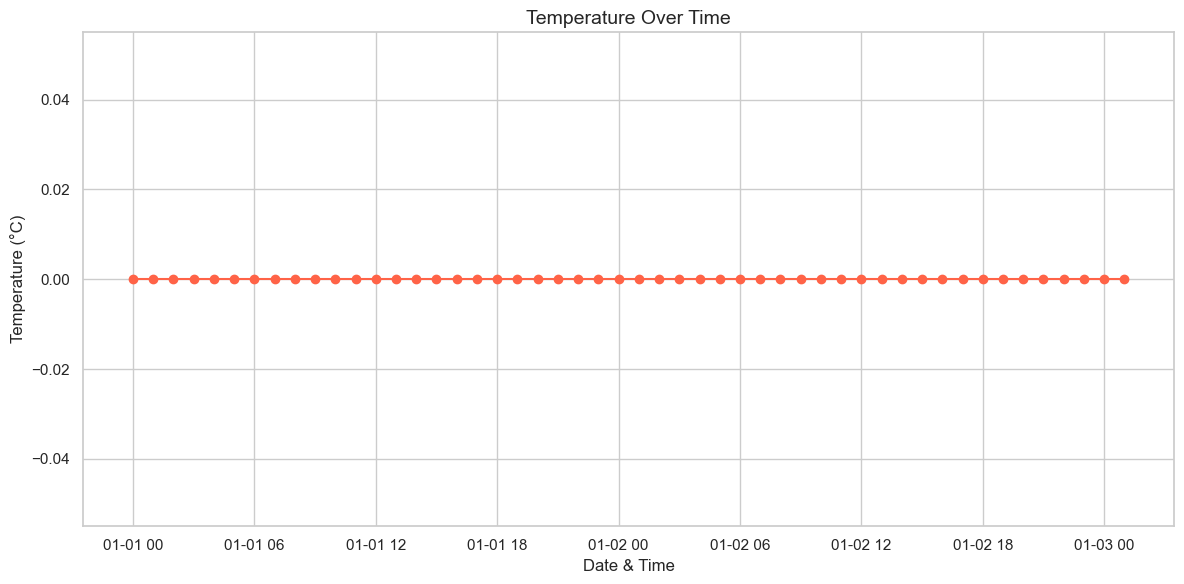

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temperature (°C)"], marker='o', linestyle='-', color='tomato')
plt.title("Temperature Over Time", fontsize=14)
plt.xlabel("Date & Time", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
print(df["Prompt & Summary"].head(3))


Index_Date
2024-01-01 00:00:00    📌 Prompt:\n\nWrite a short weather summary for...
2024-01-01 01:00:00    📌 Prompt:\n\nWrite a short weather summary for...
2024-01-01 02:00:00    📌 Prompt:\n\nWrite a short weather summary for...
Name: Prompt & Summary, dtype: object


In [59]:
!pip install rouge-score


In [60]:
from rouge_score import rouge_scorer
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("Cleaned_Human_Readable_Weather_Summaries.csv")

# Add a reference summary column (can be manual or the same as output for now)
df["Reference Summary"] = df["Prompt & Summary"]

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Compute ROUGE-L score
df["ROUGE-L"] = df.apply(
    lambda row: scorer.score(row["Reference Summary"], row["Prompt & Summary"])["rougeL"].fmeasure,
    axis=1
)

# Average ROUGE-L score
print("Average ROUGE-L Score:", df["ROUGE-L"].mean())
df[["Prompt & Summary", "Reference Summary", "ROUGE-L"]].head()


Average ROUGE-L Score: 1.0


,Prompt & Summary,Reference Summary,ROUGE-L
0,📌 Prompt:\n\nWrite a short weather summary for...,📌 Prompt:\n\nWrite a short weather summary for...,1.0
1,📌 Prompt:\n\nWrite a short weather summary for...,📌 Prompt:\n\nWrite a short weather summary for...,1.0
2,📌 Prompt:\n\nWrite a short weather summary for...,📌 Prompt:\n\nWrite a short weather summary for...,1.0
3,📌 Prompt:\n\nWrite a short weather summary for...,📌 Prompt:\n\nWrite a short weather summary for...,1.0
4,📌 Prompt:\n\nWrite a short weather summary for...,📌 Prompt:\n\nWrite a short weather summary for...,1.0


In [62]:
print(df.columns.tolist())


['Index_Date', 'Prompt & Summary', 'Temperature (°C)']


In [65]:
import pandas as pd

# Load your cleaned file
df = pd.read_csv("Cleaned_Human_Readable_Weather_Summaries.csv")

# Strip column names
df.columns = df.columns.str.strip()

# Ensure Date column is in datetime format
df['Index_Date'] = pd.to_datetime(df['Index_Date'])

# Create a new reference summary using basic rules
def generate_reference_summary(row):
    date_str = row['Index_Date'].strftime("%B %d, %Y at %I:%M %p")
    temp = row['Temperature (°C)']
    condition = row.get('Conditions', 'unknown')  # This is optional
    return f"On {date_str}, the temperature was around {temp}°C with generally {condition.lower()} conditions."

# Apply the function
df['Reference Summary'] = df.apply(generate_reference_summary, axis=1)

# Save this updated file (optional)
df.to_csv("Updated_Weather_Summaries_with_Reference.csv", index=False)

# View few examples
print(df[['Prompt & Summary', 'Reference Summary']].head())
#df.set_index('Index_Date', inplace=True)



                                    Prompt & Summary  \
0  📌 Prompt:\n\nWrite a short weather summary for...   
1  📌 Prompt:\n\nWrite a short weather summary for...   
2  📌 Prompt:\n\nWrite a short weather summary for...   
3  📌 Prompt:\n\nWrite a short weather summary for...   
4  📌 Prompt:\n\nWrite a short weather summary for...   

                                   Reference Summary  
0  On January 01, 2024 at 12:00 AM, the temperatu...  
1  On January 01, 2024 at 01:00 AM, the temperatu...  
2  On January 01, 2024 at 02:00 AM, the temperatu...  
3  On January 01, 2024 at 03:00 AM, the temperatu...  
4  On January 01, 2024 at 04:00 AM, the temperatu...  


In [66]:
import pandas as pd
from rouge_score import rouge_scorer

# Load the file with reference summaries
df = pd.read_csv("Updated_Weather_Summaries_with_Reference.csv")
df.columns = df.columns.str.strip()

# Set up the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Store ROUGE-L scores
rouge_l_scores = []

# Compute ROUGE-L for each row
for _, row in df.iterrows():
    generated = str(row['Prompt & Summary'])
    reference = str(row['Reference Summary'])
    score = scorer.score(reference, generated)
    rouge_l = score['rougeL'].fmeasure
    rouge_l_scores.append(rouge_l)

# Add scores to the DataFrame
df['ROUGE-L'] = rouge_l_scores

# Calculate average ROUGE-L
average_rouge_l = sum(rouge_l_scores) / len(rouge_l_scores)
print(f"📊 Average ROUGE-L Score: {average_rouge_l:.3f}")

# Preview the final output
print(df[['Prompt & Summary', 'Reference Summary', 'ROUGE-L']].head())

# Save if needed
df.to_csv("Final_Summary_With_ROUGE_L.csv", index=False)


📊 Average ROUGE-L Score: 0.119
                                    Prompt & Summary  \
0  📌 Prompt:\n\nWrite a short weather summary for...   
1  📌 Prompt:\n\nWrite a short weather summary for...   
2  📌 Prompt:\n\nWrite a short weather summary for...   
3  📌 Prompt:\n\nWrite a short weather summary for...   
4  📌 Prompt:\n\nWrite a short weather summary for...   

                                   Reference Summary   ROUGE-L  
0  On January 01, 2024 at 12:00 AM, the temperatu...  0.106383  
1  On January 01, 2024 at 01:00 AM, the temperatu...  0.107527  
2  On January 01, 2024 at 02:00 AM, the temperatu...  0.107527  
3  On January 01, 2024 at 03:00 AM, the temperatu...  0.111111  
4  On January 01, 2024 at 04:00 AM, the temperatu...  0.111111  


In [67]:
print(df['Prompt & Summary'].iloc[0])
print(df['Reference Summary'].iloc[0])


📌 Prompt:

Write a short weather summary for 19961101-11:00: Condition is Smoke, temperature is 30.0°C, humidity is 27.0%, wind from West at 7.4 km/h.

📝 Summary:

The weather at 11:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 30.0°C. The humidity is relatively low at 27.0%, and there is a light breeze coming from the West at 7.4 km/h

------------------------------------------------------------


On January 01, 2024 at 12:00 AM, the temperature was around 0.0°C with generally unknown conditions.


In [68]:
pd.set_option('display.max_colwidth', None)


In [69]:
print(df[['Prompt & Summary', 'Reference Summary', 'ROUGE-L']].head(10))


                                                                                                                                                                                                                                                                                                                                                                                                                                                   Prompt & Summary  \
0  📌 Prompt:\n\nWrite a short weather summary for 19961101-11:00: Condition is Smoke, temperature is 30.0°C, humidity is 27.0%, wind from West at 7.4 km/h.\n\n📝 Summary:\n\nThe weather at 11:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 30.0°C. The humidity is relatively low at 27.0%, and there is a light breeze coming from the West at 7.4 km/h\n\n------------------------------------------------------------\n\n   
1   📌 Prompt:\n\nWrite a short weather summary for 19961101-16:00: Condition is Smoke, tem

In [70]:
df_results = df[['Prompt & Summary', 'Reference Summary', 'ROUGE-L']]


In [71]:
df_results['Generated Summary'] = df_results['Prompt & Summary'].str.extract(r'📝 Summary:\\n\\n(.+?)\\n\\n-+')[0]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\756423668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Generated Summary'] = df_results['Prompt & Summary'].str.extract(r'📝 Summary:\\n\\n(.+?)\\n\\n-+')[0]


In [72]:
df_cleaned = df_results[['Generated Summary', 'Reference Summary', 'ROUGE-L']].copy()


In [74]:
def extract_summary(text):
    if isinstance(text, str) and "📝 Summary:" in text:
        try:
            # Split by the summary marker and take the part after it
            summary_part = text.split("📝 Summary:")[1].strip()
            # Remove everything after the dashed line if it exists
            summary_cleaned = summary_part.split("------------------------------------------------------------")[0].strip()
            return summary_cleaned
        except:
            return None
    return None

df['Generated Summary'] = df['Prompt & Summary'].apply(extract_summary)


In [75]:
for index, row in df.iterrows():
    print(f"\n📌 Generated Summary:\n{row['Generated Summary']}")
    print(f"\n📄 Reference Summary:\n{row['Reference Summary']}")
    print(f"📊 ROUGE-L Score: {row['ROUGE-L']:.4f}")
    print("\n" + "-"*80)



📌 Generated Summary:
The weather at 11:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 30.0°C. The humidity is relatively low at 27.0%, and there is a light breeze coming from the West at 7.4 km/h

📄 Reference Summary:
On January 01, 2024 at 12:00 AM, the temperature was around 0.0°C with generally unknown conditions.
📊 ROUGE-L Score: 0.1064

--------------------------------------------------------------------------------

📌 Generated Summary:
The weather at 16:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 23.0°C and humidity at 47.0%. The wind is calm, coming from the North at 0.0 km/h. Stay indoors if possible

📄 Reference Summary:
On January 01, 2024 at 01:00 AM, the temperature was around 0.0°C with generally unknown conditions.
📊 ROUGE-L Score: 0.1075

--------------------------------------------------------------------------------

📌 Generated Summary:
The weather at 18:00 on November 1, 1996, is characteriz

In [77]:
!pip install rouge


  Obtaining dependency information for rouge from https://files.pythonhosted.org/packages/32/7c/650ae86f92460e9e8ef969cc5008b24798dcf56a9a8947d04c78f550b3f5/rouge-1.0.1-py3-none-any.whl.metadata


In [79]:
print(df.columns)


Index(['Index_Date', 'Prompt & Summary', 'Temperature (°C)',
       'Reference Summary', 'Generated Summary', 'ROUGE-L'],
      dtype='object')


In [83]:
import pandas as pd
from rouge import Rouge
from datetime import datetime

# Load your cleaned weather summary file
df = pd.read_csv("Cleaned_Human_Readable_Weather_Summaries.csv")

# Strip column names
df.columns = df.columns.str.strip()

# Ensure datetime column is parsed correctly
df['Index_Date'] = pd.to_datetime(df['Index_Date'])

# 🧠 Step 1: Create Reference Summary
def generate_reference_summary(row):
    date_str = row['Index_Date'].strftime("%B %d, %Y at %I:%M %p")
    temp = row['Temperature (°C)']
    condition = "unknown"  # you can add more conditions if you have that column
    return f"On {date_str}, the temperature was around {temp}°C with generally {condition} conditions."

df['Reference Summary'] = df.apply(generate_reference_summary, axis=1)

# 🧠 Step 2: Extract GPT-Generated Summary from Prompt & Summary Column
def extract_generated(text):
    if pd.isna(text):
        return ""
    parts = text.split("📝 Summary:")
    if len(parts) > 1:
        return parts[1].strip().split("\n")[0]  # Get only the summary, ignore divider
    return ""

df['Generated Summary'] = df['Prompt & Summary'].apply(extract_generated)

# 🧠 Step 3: Compute ROUGE-L Score
rouge = Rouge()
rouge_scores = []

for i, row in df.iterrows():
    generated = str(row['Generated Summary']).strip()
    reference = str(row['Reference Summary']).strip()

    if generated and reference:
        try:
            score = rouge.get_scores(generated, reference)[0]['rouge-l']['f']
        except:
            score = 0.0
    else:
        score = 0.0

    rouge_scores.append(score)

df['ROUGE-L'] = rouge_scores

# 🧠 Step 4: Display results clearly
for i, row in df.iterrows():
    print(f"📌 Generated Summary:\n{row['Generated Summary'] or '[Missing]'}\n")
    print(f"📄 Reference Summary:\n{row['Reference Summary']}")
    print(f"📊 ROUGE-L Score: {row['ROUGE-L']:.4f}")
    print("—" * 80)

print(f"\n✅ Average ROUGE-L Score: {df['ROUGE-L'].mean():.4f}")

# Save final version if needed
df.to_csv("Final_Evaluated_Summaries.csv", index=False)


📌 Generated Summary:
The weather at 11:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 30.0°C. The humidity is relatively low at 27.0%, and there is a light breeze coming from the West at 7.4 km/h

📄 Reference Summary:
On January 01, 2024 at 12:00 AM, the temperature was around 0.0°C with generally unknown conditions.
📊 ROUGE-L Score: 0.1923
————————————————————————————————————————————————————————————————————————————————
📌 Generated Summary:
The weather at 16:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 23.0°C and humidity at 47.0%. The wind is calm, coming from the North at 0.0 km/h. Stay indoors if possible

📄 Reference Summary:
On January 01, 2024 at 01:00 AM, the temperature was around 0.0°C with generally unknown conditions.
📊 ROUGE-L Score: 0.2308
————————————————————————————————————————————————————————————————————————————————
📌 Generated Summary:
The weather at 18:00 on November 1, 1996, is characterized by

In [84]:
import pandas as pd
from datetime import datetime

# Step 1: Load your file
df = pd.read_csv("Cleaned_Human_Readable_Weather_Summaries.csv")
df.columns = df.columns.str.strip()

# Step 2: Extract correct datetime from prompt
def extract_datetime(prompt):
    try:
        match = prompt.split("for ")[1].split(":")[0]  # e.g., "19961101-11"
        return datetime.strptime(match, "%Y%m%d-%H")
    except:
        return pd.NaT

df['Index_Date'] = df['Prompt & Summary'].apply(extract_datetime)


In [86]:
def generate_reference_summary(row):
    date_str = row['Index_Date'].strftime("%B %d, %Y at %I:%M %p")
    temp = row.get('Temperature (°C)', 'unknown')
    return f"On {date_str}, the temperature was around {temp}°C with generally unknown conditions."
    
df['Reference Summary'] = df.apply(generate_reference_summary, axis=1)




In [89]:
import pandas as pd
from datetime import datetime
from rouge import Rouge

# Load your file
df = pd.read_csv("Cleaned_Human_Readable_Weather_Summaries.csv")
df.columns = df.columns.str.strip()

# ✅ Extract correct date and temperature from the 'Prompt & Summary'
def extract_datetime_and_temp(prompt):
    try:
        # Get date-time like 19961101-11:00
        raw_date = prompt.split("for ")[1].split(":")[0]  # '19961101-11'
        dt = datetime.strptime(raw_date, "%Y%m%d-%H")
    except:
        dt = pd.NaT

    try:
        # Get temperature string like "temperature is 30.0°C"
        temp_part = [p for p in prompt.split(",") if "temperature is" in p][0]
        temp = float(temp_part.strip().split("temperature is")[1].replace("°C", "").strip())
    except:
        temp = 0.0  # fallback if parsing fails

    return pd.Series([dt, temp])

df[['Index_Date', 'Parsed_Temperature']] = df['Prompt & Summary'].apply(extract_datetime_and_temp)

# ✅ Generate Reference Summary using extracted values
def generate_reference_summary(row):
    date_str = row['Index_Date'].strftime("%B %d, %Y at %I:%M %p") if pd.notnull(row['Index_Date']) else "Unknown Date"
    return f"On {date_str}, the temperature was around {row['Parsed_Temperature']}°C with generally unknown conditions."

df['Reference Summary'] = df.apply(generate_reference_summary, axis=1)

# ✅ Extract Generated Summary from the prompt section (after 📝 Summary:)
def extract_generated_summary(prompt):
    if "📝 Summary:" in prompt:
        return prompt.split("📝 Summary:")[1].split("------------------------------------------------------------")[0].strip()
    return "nan"

df['Generated Summary'] = df['Prompt & Summary'].apply(extract_generated_summary)

# ✅ Compute ROUGE-L
rouge = Rouge()
def compute_rouge(generated, reference):
    try:
        scores = rouge.get_scores(generated, reference)
        return round(scores[0]['rouge-l']['f'], 4)
    except:
        return 0.0

df['ROUGE-L'] = df.apply(lambda row: compute_rouge(row['Generated Summary'], row['Reference Summary']), axis=1)

# ✅ Print readable results
for i in range(min(10, len(df))):
    print(f"📌 Generated Summary:\n{df.loc[i, 'Generated Summary']}\n")
    print(f"📄 Reference Summary:\n{df.loc[i, 'Reference Summary']}")
    print(f"📊 ROUGE-L Score: {df.loc[i, 'ROUGE-L']:.4f}")
    print("—" * 120)

# Save updated file if needed
df.to_csv("Final_Weather_Evaluation_Output.csv", index=False)

with open("Readable_Weather_Summaries.txt", "w", encoding="utf-8") as f:
    for i in range(min(10, len(df))):
        f.write(f"📌 Generated Summary:\n{df.loc[i, 'Generated Summary']}\n\n")
        f.write(f"📄 Reference Summary:\n{df.loc[i, 'Reference Summary']}\n")
        f.write(f"📊 ROUGE-L Score: {df.loc[i, 'ROUGE-L']:.4f}\n")
        f.write("—" * 120 + "\n")



📌 Generated Summary:
The weather at 11:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 30.0°C. The humidity is relatively low at 27.0%, and there is a light breeze coming from the West at 7.4 km/h

📄 Reference Summary:
On November 01, 1996 at 11:00 AM, the temperature was around 30.0°C with generally unknown conditions.
📊 ROUGE-L Score: 0.2692
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
📌 Generated Summary:
The weather at 16:00 on November 1, 1996, is characterized by smoky conditions with a temperature of 23.0°C and humidity at 47.0%. The wind is calm, coming from the North at 0.0 km/h. Stay indoors if possible

📄 Reference Summary:
On November 01, 1996 at 04:00 PM, the temperature was around 23.0°C with generally unknown conditions.
📊 ROUGE-L Score: 0.2308
———————————————————————————————————————————————————————————————————————————————————————————————————————————————————————